<a href="https://colab.research.google.com/github/TuNguyen142/AL-13-2/blob/main/AL_3_4_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()





169001437/169001437 [==============================] - 6s 0us/step


In [4]:

x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255


In [5]:
from keras.utils import to_categorical
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

y_test = to_categorical(y_test, 100)
y_train=to_categorical(y_train,100)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(2000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              6146000   
                                                                 
 dense_1 (Dense)             (None, 100)               200100    
                                                                 
Total params: 6,346,100
Trainable params: 6,346,100
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')
model.fit(x_train, y_train, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(x_train, y_train)
print('test_accuracy: ', test_acc)
print('test_loss: ', test_loss)

Epoch 1/10
391/391 [==============================] - 37s 93ms/step - loss: 4.6022 - accuracy: 0.0140
Epoch 2/10
391/391 [==============================] - 35s 90ms/step - loss: 4.5658 - accuracy: 0.0251
Epoch 3/10
391/391 [==============================] - 38s 96ms/step - loss: 4.4574 - accuracy: 0.0439
Epoch 4/10
391/391 [==============================] - 35s 90ms/step - loss: 4.3068 - accuracy: 0.0590
Epoch 5/10
391/391 [==============================] - 38s 96ms/step - loss: 4.1760 - accuracy: 0.0709
Epoch 6/10
391/391 [==============================] - 37s 94ms/step - loss: 4.0951 - accuracy: 0.0794
Epoch 7/10
391/391 [==============================] - 37s 94ms/step - loss: 4.0462 - accuracy: 0.0849
Epoch 8/10
391/391 [==============================] - 36s 92ms/step - loss: 4.0133 - accuracy: 0.0892
Epoch 9/10
391/391 [==============================] - 36s 92ms/step - loss: 3.9868 - accuracy: 0.0937
Epoch 10/10
1563/1563 [==============================] - 20s 13ms/step - loss: 3.9

In [8]:
model.save('model100.h5')

# Mục mới

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
model.save('/content/gdrive/MyDrive/1/model100.h5')

In [21]:
from keras.models import load_model
from google.colab import drive
drive.mount('/content/drive')
model=load_model('/content/drive/MyDrive/1/model100.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


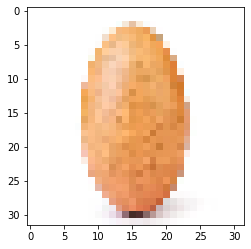

In [31]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/12.webp', target_size=(32,32))
plt.imshow(img)

In [32]:
import numpy as np
img = img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 81ms/step


array([20])

NameError: ignored

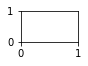

In [33]:
folder = '/content/gdrive/MyDrive/ColabNotebooks'

for i in range (30):
    plt.subplot(6,5,i+1)
    filename = folder + 'A' + str(i) + 'jpg'
    img = imread(filename)
    plt.imshow(img)
plt.show()